In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import datetime as dt

In [112]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
%autoreload 2

## Get emoncms feeds

In [114]:
import emoncmsfeed as getfeeds

In [115]:
dataframefreq = '10min'

feeds =  { 'T_ext':2, 'T_int':3 }

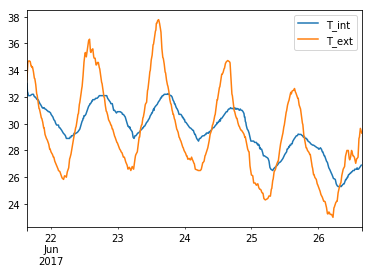

In [116]:
df = getfeeds.builddataframe( feeds, dataframefreq )
df.plot();

## Get weather

In [130]:
import weatherfeed as wf

In [139]:
coords_grenoble = (45.1973288, 5.7139923) #(45.1973288, 5.7103223)

In [140]:
df.index[-1]

Timestamp('2017-06-26 15:40:00', freq='10T')

In [141]:
startday, lastday = df.index[0], df.index[-1]

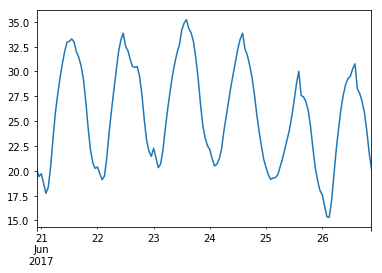

In [142]:
allweatherdata = wf.buildmultidayDF(startday, lastday, coords_grenoble )

allweatherdata['temperature'].plot()

In [143]:
allweatherdata = allweatherdata.resample(dataframefreq).interpolate()

In [144]:
alldata = pd.concat( [df, allweatherdata ], axis=1 )

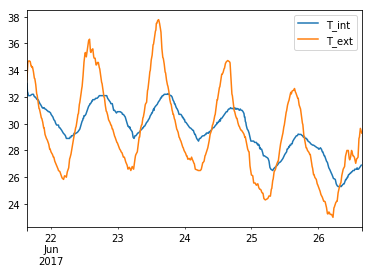

In [145]:
df.plot()

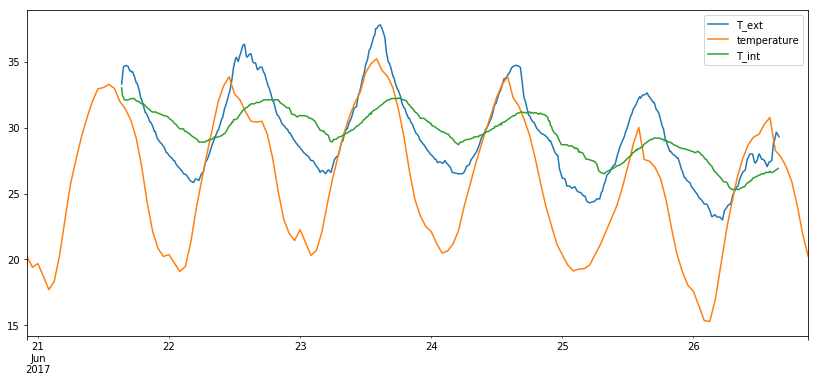

In [146]:
alldata[['T_ext', 'temperature', 'T_int']].plot(figsize=(14, 6))

In [126]:
alldata.columns

Index(['T_int', 'T_ext', 'apparentTemperature', 'cloudCover',
       'precipIntensity', 'temperature', 'windBearing', 'windSpeed'],
      dtype='object')

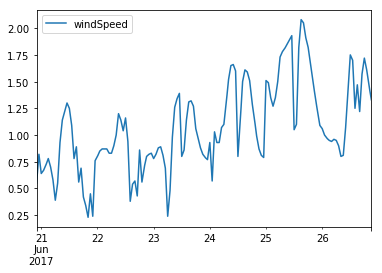

In [127]:
alldata[['windSpeed']].plot()